In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import pprint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import time
import seaborn as sns
import matplotlib.cm as cm
import statsmodels as sm
import pickle
import math

In [3]:
cases = pd.read_csv("data/GB/country/data_2022-Jun-24.csv", keep_default_na=False, na_values=[""])
cases = cases.drop(['areaType'], axis=1)
cases['date'] = pd.to_datetime(cases['date'].astype(str))
cases = cases.sort_values(by='date')
searches = pd.read_csv("data/GB/country/searches/processed.csv", keep_default_na=False,na_values=[""])
searches['date'] = pd.to_datetime(searches['date'].astype(str))
searches = searches.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id'], axis=1)
searches = searches.sort_values(by='date')
df = pd.merge(cases, searches, on='date', how='outer').iloc[::-1].sort_values(by='date')
# df.index = range(len(df))
df = df.set_index('date')
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.22,0.39,3.31,0.40,2.61,0.37,0.17,0.54,0.32
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.53,0.22,0.43,3.53,0.39,2.81,0.40,0.15,0.57,0.35
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.23,0.43,3.50,0.42,2.90,0.43,0.17,0.56,0.35
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.41,3.22,0.41,3.00,0.40,0.17,0.48,0.33
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.42,3.28,0.40,3.10,0.43,0.19,0.49,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.07,0.44,0.70,4.20,0.50,4.07,0.56,0.23,0.79,0.45
2022-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.08,0.44,0.71,4.11,0.49,3.58,0.56,0.21,0.69,0.49
2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.29,0.48,0.75,4.22,0.47,3.78,0.59,0.20,0.86,0.49


In [4]:
date = '2022-05-19'
df = df.loc[:date]
df['areaCode'] = df['areaCode'].fillna(df['areaCode'].iloc[-1])
df['areaName'] = df['areaName'].fillna(df['areaName'].iloc[-1])
df

/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_76021/2888749485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areaCode'] = df['areaCode'].fillna(df['areaCode'].iloc[-1])
/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_76021/2888749485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areaName'] = df['areaName'].fillna(df['areaName'].iloc[-1])


,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.22,0.39,3.31,0.40,2.61,0.37,0.17,0.54,0.32
2019-01-02,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.53,0.22,0.43,3.53,0.39,2.81,0.40,0.15,0.57,0.35
2019-01-03,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.58,0.23,0.43,3.50,0.42,2.90,0.43,0.17,0.56,0.35
2019-01-04,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.41,3.22,0.41,3.00,0.40,0.17,0.48,0.33
2019-01-05,United Kingdom,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,0.23,0.42,3.28,0.40,3.10,0.43,0.19,0.49,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,173.0,22181462.0,7943.0,22207616.0,6659.0,21024430.0,1284.0,1183186.0,...,2.28,0.56,0.75,4.55,0.49,4.39,0.69,0.24,0.89,0.46
2022-05-16,United Kingdom,K02000001,22337.0,22203799.0,9391.0,22217007.0,7719.0,21032149.0,1672.0,1184858.0,...,2.32,0.54,0.77,4.39,0.50,3.67,0.61,0.22,0.94,0.50
2022-05-17,United Kingdom,K02000001,8603.0,22212395.0,8262.0,22225269.0,6879.0,21039028.0,1383.0,1186241.0,...,2.28,0.57,0.77,4.41,0.47,3.61,0.58,0.21,1.12,0.46


In [5]:
column = df.columns.get_loc('areaCode')+1
df.iloc[:, column:]= df.iloc[:, column:].fillna(0)
df

/var/folders/16/p0_pv93912d7zzx29sykqy800000gn/T/ipykernel_76021/1993940853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, column:]= df.iloc[:, column:].fillna(0)


,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.58,0.22,0.39,3.31,0.40,2.61,0.37,0.17,0.54,0.32
2019-01-02,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.53,0.22,0.43,3.53,0.39,2.81,0.40,0.15,0.57,0.35
2019-01-03,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.58,0.23,0.43,3.50,0.42,2.90,0.43,0.17,0.56,0.35
2019-01-04,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.51,0.23,0.41,3.22,0.41,3.00,0.40,0.17,0.48,0.33
2019-01-05,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.51,0.23,0.42,3.28,0.40,3.10,0.43,0.19,0.49,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,173.0,22181462.0,7943.0,22207616.0,6659.0,21024430.0,1284.0,1183186.0,...,2.28,0.56,0.75,4.55,0.49,4.39,0.69,0.24,0.89,0.46
2022-05-16,United Kingdom,K02000001,22337.0,22203799.0,9391.0,22217007.0,7719.0,21032149.0,1672.0,1184858.0,...,2.32,0.54,0.77,4.39,0.50,3.67,0.61,0.22,0.94,0.50
2022-05-17,United Kingdom,K02000001,8603.0,22212395.0,8262.0,22225269.0,6879.0,21039028.0,1383.0,1186241.0,...,2.28,0.57,0.77,4.41,0.47,3.61,0.58,0.21,1.12,0.46


In [6]:
news = pd.read_csv('data/GB/news_UK.csv')
news['date'] = pd.to_datetime(news['date'].astype(str))
news = news.set_index('date')
news = news.rename(columns={'covid-news-ratio-UK': 'news'})
df = pd.merge(df, news, on='date', how='inner')
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis,news
date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.26,0.47,2.85,0.40,2.35,0.40,0.18,0.62,0.35,0.000598
2019-10-01,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.48,2.82,0.41,2.30,0.39,0.18,0.56,0.32,0.000571
2019-10-02,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.45,2.78,0.40,2.54,0.39,0.19,0.45,0.31,0.000283
2019-10-03,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23,0.43,2.67,0.38,2.58,0.40,0.19,0.40,0.32,0.000842
2019-10-04,United Kingdom,K02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.43,2.52,0.35,2.35,0.39,0.19,0.38,0.33,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,173.0,22181462.0,7943.0,22207616.0,6659.0,21024430.0,1284.0,1183186.0,...,0.56,0.75,4.55,0.49,4.39,0.69,0.24,0.89,0.46,0.051887
2022-05-16,United Kingdom,K02000001,22337.0,22203799.0,9391.0,22217007.0,7719.0,21032149.0,1672.0,1184858.0,...,0.54,0.77,4.39,0.50,3.67,0.61,0.22,0.94,0.50,0.025424
2022-05-17,United Kingdom,K02000001,8603.0,22212395.0,8262.0,22225269.0,6879.0,21039028.0,1383.0,1186241.0,...,0.57,0.77,4.41,0.47,3.61,0.58,0.21,1.12,0.46,0.056035


In [7]:
column = df.columns.get_loc('areaCode')+1
index = df.index
columns = df.columns

df = pd.concat([df.iloc[:, :column], pd.DataFrame(df.iloc[:, column:].rolling(7).mean(), index=index, columns=columns[column:])], axis=1)
df = df.dropna(how='any')
df

,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis,news
date,,,,,,,,,,,,,,,,,,,,,
2019-10-06,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.240000,0.452857,2.741429,0.382857,2.525714,0.394286,0.184286,0.474286,0.317143,0.000467
2019-10-07,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.237143,0.460000,2.745714,0.384286,2.535714,0.392857,0.184286,0.455714,0.318571,0.000381
2019-10-08,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.237143,0.468571,2.755714,0.381429,2.562857,0.394286,0.185714,0.445714,0.322857,0.000342
2019-10-09,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.237143,0.477143,2.771429,0.378571,2.557143,0.398571,0.185714,0.444286,0.325714,0.000340
2019-10-10,United Kingdom,K02000001,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.237143,0.485714,2.794286,0.377143,2.537143,0.397143,0.185714,0.451429,0.325714,0.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,United Kingdom,K02000001,9605.571429,2.216663e+07,8234.571429,2.218537e+07,6905.285714,2.100572e+07,1329.285714,1.179655e+06,...,0.494286,0.695714,4.204286,0.464286,3.814286,0.660000,0.227143,0.804286,0.441429,0.042188
2022-05-16,United Kingdom,K02000001,9042.285714,2.217570e+07,8050.571429,2.219342e+07,6738.571429,2.101246e+07,1312.000000,1.180967e+06,...,0.495714,0.700000,4.194286,0.467143,3.792857,0.645714,0.228571,0.804286,0.448571,0.038736
2022-05-17,United Kingdom,K02000001,8783.714286,2.218451e+07,7843.428571,2.220127e+07,6563.285714,2.101902e+07,1280.142857,1.182247e+06,...,0.507143,0.701429,4.188571,0.465714,3.775714,0.630000,0.227143,0.835714,0.447143,0.042725


In [8]:
symptom_type = ['ons', 'ons&ff100', 'wider']

In [9]:
symptoms_ons =  ["Abdominal pain",  "Ageusia", "Anosmia", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia", "Nausea", 
                "Shortness of breath", "Sore throat", "Vomiting", "Weakness", ] 
symptoms_ff100 = ["Anosmia", "Arthralgia", "Clouding of consciousness", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia", 
            "Nausea", "Nosebleed", "Rhinitis", "Shortness of breath", "Skin rash", "Sore throat", "Vomiting",] 
symptoms_union = sorted(list(set(symptoms_ons) | set(symptoms_ff100)))
symptoms_wider = ["Abdominal pain", "Ageusia", "Anosmia", "Bronchitis", "Chills", "Cough", "Diarrhea", "Dizziness", "Dysgeusia", 
                  "Fatigue", "Fever", "Headache", "Hypoxia", "Laryngitis", "Low-grade fever", "Myalgia", "Nausea", "Pneumonia", "Rhinitis", 
                  "Shallow breathing", "Shortness of breath", "Sore throat", "Throat irritation", "Vertigo", "Vomiting", "Weakness", "Wheeze", ]
symptoms_wider= sorted(list(set(symptoms_wider) | set(symptoms_union)))

symptoms_ons =  ['symptom:' + s for s in symptoms_ons] +['news']
symptoms_union  = ['symptom:' + s for s in symptoms_union] +['news']
symptoms_wider  = ['symptom:' + s for s in symptoms_wider] +['news']
# symptoms_ons  = ['symptom:' + s for s in symptoms_ons] 
# symptoms_union = ['symptom:' + s for s in symptoms_union] 
# symptoms_wider = ['symptom:' + s for s in symptoms_wider] 
symptom_lists = [symptoms_ons, symptoms_union, symptoms_wider]

In [10]:
column = df.columns.get_loc('symptom:Abdominal obesity')
dfs = {}
for s_type, s_list in zip(symptom_type, symptom_lists):
    dfs[s_type] = pd.concat([df.iloc[:, :column], df[s_list]], axis=1)

In [11]:
def adj_r2_score(y, y_pred, p):
    return 1-(1-r2_score(y, y_pred)) * (len(y)-1) / (len(y) - p - 1)

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

def linear_regression(df, base_model='Linear', metric='newCasesBySpecimenDate', train_date=('2020-02-13', '2022-05-19'), test_date=None, 
                      shift=0, positive=False, alpha=10**np.arange(-6, -1, 0.1), l1_ratio=[.1, .25, .5, .7, .9, .95, .99, 1], cv=5, random_state=None):
        if base_model == 'Linear':
            model = LinearRegression(positive=positive)
        elif base_model == 'Lasso':
            model = LassoCV(alphas=alpha, cv=cv, max_iter=100000, positive=positive, random_state=random_state)
        elif base_model =='Ridge':
            model = RidgeCV(alphas=alpha, cv=cv)
        elif base_model == 'Elastic':
            model = ElasticNetCV(l1_ratio=l1_ratio, alphas=alpha, cv=cv, max_iter=100000, positive=positive, random_state=random_state)
        
        mm_y = MinMaxScaler()
        mm_x = MinMaxScaler()
        idx = df.columns.get_loc('cumAdmissions')+1
        y_train = df[metric].shift(shift).loc[train_date[0]:train_date[1]].dropna()
        y_train = pd.Series(mm_y.fit_transform(y_train.values.reshape(len(y_train),1)).flatten(), index=y_train.index)
        x_train = df.iloc[:, idx:].loc[y_train.index[0]:y_train.index[-1]]
        x_train = pd.DataFrame(mm_x.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
        
        train_stats = {}
        model.fit(x_train, y_train)
        y_train_pred = pd.Series(model.predict(x_train), index=x_train.index)
        y_train_pred = y_train_pred.where(y_train_pred>=0, 0)
        train_stats['R^2'] = r2_score(y_train, y_train_pred)
        train_stats['Adj. R^2'] = adj_r2_score(y_train, y_train_pred, x_train.shape[1])
        train_stats['Correlation'] = np.corrcoef(y_train.values, y_train_pred.values)[0][1]
        y_train = pd.Series(mm_y.inverse_transform(y_train.values.reshape(len(y_train),1)).flatten(), index=y_train.index)
        y_train_pred = pd.Series(mm_y.inverse_transform(y_train_pred.values.reshape(len(y_train),1)).flatten(), index=y_train_pred.index)
        train_stats['RMSE:'] = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_stats['MAE'] = mean_absolute_error(y_train, y_train_pred)
        train_stats['MAPE'] = mean_absolute_percentage_error(y_train, y_train_pred)
        

        test_stats = {}
        y_test_pred = None
        if test_date is not None:
            y_test = df[metric].shift(shift).loc[test_date[0]:test_date[1]].dropna()
            y_test = pd.Series(mm_y.transform(y_test.values.reshape(len(y_train),1)).flatten(), index=y_test.index)
            x_test = df.iloc[:, idx:].loc[y_test.index[0]:y_test.index[-1]]
            x_test = pd.DataFrame(mm_x.transform(x_test), index=x_test.index, columns=x_test.columns)
            x_test = sm.add_constant(x_test, has_constant='add')
            y_test_pred =  pd.Series(model.predict(x_test), index=x_test.index)
            test_stats['R^2'] = r2_score(y_test, y_test_pred)
            test_stats['Adj. R^2'] = adj_r2_score(y_test, y_test_pred, x_test.shape[1])
            test_stats['Correlation'] = np.corrcoef(y_test.values, y_test_pred.values)[0][1]
            y_test = pd.Series(mm_y.inverse_transform(y_test.values.reshape(len(y_train),1)).flatten(), index=y_test.index)
            y_test_pred = pd.Series(mm_y.inverse_transform(y_test_pred.values.reshape(len(y_train),1)).flatten(), index=y_test_pred.index)
            test_stats['RMSE:'] = np.sqrt(mean_squared_error(y_test, y_test_pred))
            test_stats['MAE'] = mean_absolute_error(y_test, y_test_pred)
            test_stats['MAPE'] = mean_absolute_percentage_error(y_test, y_test_pred)
        
        coeffs = pd.DataFrame({base_model:np.append(model.intercept_, model.coef_.flatten())}, 
                              index=np.append('const', x_train.columns))
        return model, train_stats, test_stats,  y_train_pred, y_test_pred, coeffs

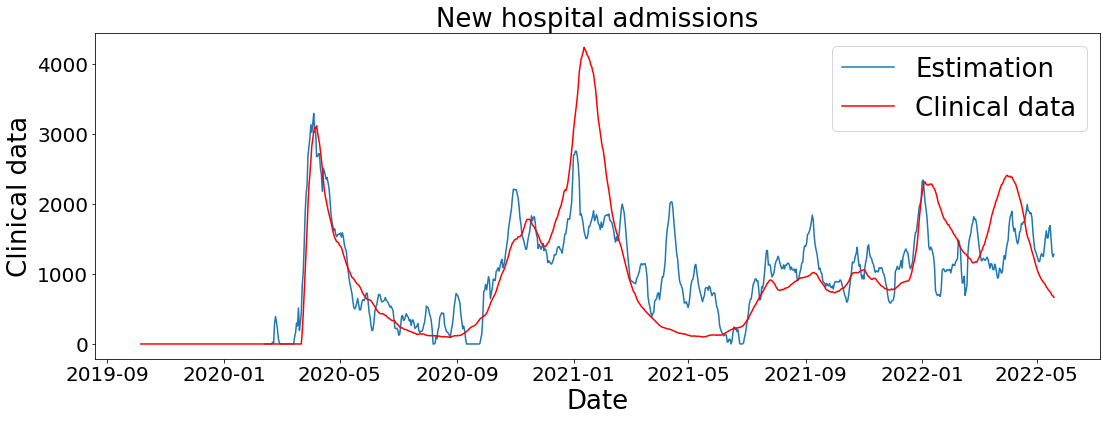

In [551]:
df = dfs['ons']
# metric = 'newCasesBySpecimenDate'
# metric = 'newDeaths28DaysByDeathDate'
metric = 'newAdmissions'
model = 'Linear'
# model = 'Elastic'
date = ['2020-02-13', '2022-05-19']
# date = ['2020-02-13', '2020-06-30']
# date = ['2020-07-01', '2021-03-31']
# date = ['2021-04-01', '2022-05-19']

r = linear_regression(df, base_model=model, metric=metric, train_date=date, test_date=None,
                      shift=0, positive=False, alpha=10**np.arange(-6, -3, 0.25), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=1)

if metric == 'newCasesBySpecimenDate':
    m = 'New confirmed cases'
elif metric == 'newDeaths28DaysByDeathDate':
    m = 'New deaths' 
elif metric == 'newAdmissions':
    m = 'New hospital admissions'

plt.figure(figsize=(18, 6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Clinical data', fontsize=26)
plt.xlabel('Date', fontsize=26)
plt.title(m, fontsize=26)
plt.plot(r[3])
plt.plot(df[metric], color='r')
plt.legend(['Estimation', 'Clinical data'], fontsize=26)
plt.savefig('images/country/gof_{}_{}_{}_{}.pdf'.format(metric, model, date[0], date[1]))


In [254]:
ons_weights = {'symptom:Ageusia': 18.753529411764706,
 'symptom:Sore throat': 32.065294117647056,
 'symptom:Cough': 41.81411764705882,
 'symptom:Nausea': 9.48470588235294,
 'symptom:Vomiting': 9.48470588235294,
 'symptom:Shortness of breath': 14.321764705882355,
 'symptom:Fever': 24.42941176470588,
 'symptom:Myalgia': 25.725294117647056,
 'symptom:Diarrhea': 6.815294117647059,
 'symptom:Headache': 37.633529411764705,
 'symptom:Fatigue': 37.25352941176472,
 'symptom:Weakness': 37.25352941176472,
 'symptom:Anosmia': 18.004117647058823,
 'symptom:Abdominal pain': 7.315294117647059,
}

In [540]:
df = dfs['ons']
# metric = 'newCasesBySpecimenDate'
metric = 'newDeaths28DaysByDeathDate'
# metric = 'newAdmissions'
date = ('2020-02-13', '2022-05-19')
shift = 0

coef_table = pd.DataFrame(index=(np.append('const', df.columns[df.columns.get_loc(symptoms_ons[0]):])), 
                                 columns=[])
ons_table = np.round(pd.DataFrame(ons_weights, index=['ONS']).T/100, 3)
coef_table = pd.concat([coef_table, ons_table], axis=1, join='outer')

linear = np.round(linear_regression(df.iloc[:, :], base_model='Linear', metric=metric, alpha=10**np.arange(-6, -1, 0.25),
                           train_date=date, shift=shift, cv=10)[5], 3)
coef_table = pd.concat([coef_table, linear], axis=1, join='outer')
# lasso = np.round(linear_regression(df.iloc[:, :], base_model='Lasso', metric=metric, alpha=10**np.arange(-6, -3, 0.25),
#                            train_date=date, shift=shift cv=10)[5], 3)
# coef_table = pd.concat([coef_table, lasso], axis=1, join='inner')
elastic = np.round(linear_regression(df.iloc[:, :], base_model='Elastic', metric=metric, alpha=10**np.arange(-6, 1, 0.1),
                           train_date=date, shift=shift, cv=10)[5], 3)
coef_table = pd.concat([coef_table, elastic], axis=1, join='outer')
coef_table = coef_table.sort_values('ONS', ascending=False)
elastic = linear_regression(df.iloc[:, :], base_model='Elastic', metric=metric, alpha=10**np.arange(-6, -1, 0.1),
                           train_date=date, shift=shift, cv=10)
print(elastic[0].alpha_, elastic[0].l1_ratio_)
coef_table

0.007943282347242562 0.1


,ONS,Linear,Elastic
symptom:Cough,0.418,-0.164,-0.066
symptom:Headache,0.376,0.711,0.408
symptom:Fatigue,0.373,-1.220,-0.200
symptom:Weakness,0.373,-0.077,-0.125
symptom:Sore throat,0.321,-0.636,-0.213
symptom:Myalgia,0.257,-0.055,0.000
symptom:Fever,0.244,-0.936,-0.117
symptom:Ageusia,0.188,0.128,0.150
symptom:Anosmia,0.180,-0.268,0.063
symptom:Shortness of breath,0.143,1.453,0.177


In [19]:
from statsmodels import api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

def forecasting_auto_regression(df, base_model='Linear', metric='newCasesBySpecimenDate', date=('2020-02-13', '2022-05-19'), n=30, 
                           lag=7, period=0, positive=False, alpha=10**np.arange(-6, -2, 0.25), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                           cv=3, random_state=None, news=True, auto=True, search=True, auto_lag=2):
    if base_model == 'Linear':
        model = LinearRegression(positive=positive)
    elif base_model == 'Lasso':
        model = LassoCV(alphas=alpha, cv=cv, max_iter=100000, positive=positive, random_state=random_state)
    elif base_model =='Ridge':
        model = RidgeCV(alphas=alpha, cv=cv)
    elif base_model == 'Elastic':
        model = ElasticNet(l1_ratio=0.1, alpha=0.01, max_iter=100000, positive=positive, random_state=random_state)
        
    idx = df.columns.get_loc('cumAdmissions')+1
    y = pd.DataFrame(df[metric])
    if news==False:
        x = df.iloc[:, idx:-1]
    else:
        x = df.iloc[:, idx:]
    
    x_tmp = pd.DataFrame(index=y.index, columns=[])
    if auto==True:
        for i in range(0, auto_lag+1):
            x_tmp = pd.concat([x_tmp, pd.DataFrame(df[metric].shift(i+lag).values, index=y.index, columns=[metric+('_ar_'+str(i))])], axis=1)
    if search==True:
        for i in range(0, auto_lag+1):
            x_tmp = pd.concat([x_tmp, pd.DataFrame(x.shift(i).values, index=x.index, columns=x.columns+('_lag_'+str(i)))], axis=1)
    x = x_tmp.dropna()
    y = y.loc[x.index[0]:x.index[-1]]
    
    errors = {}
    predictions = {}
    coeffs = pd.DataFrame(index=x.columns, columns=[])
    for i in range(len(y)-lag-period-n):
        mm_y = MinMaxScaler()
        mm_x = MinMaxScaler()
        y_train = mm_y.fit_transform(y.iloc[period+i:period+i+n].values.reshape(len(y.iloc[period+i:period+i+n]),1))
        y_train = pd.Series(y_train.flatten(), index=y.index[period+i:period+i+n])
        x_train = pd.DataFrame(mm_x.fit_transform(x.iloc[i:n+i, :]), index=x.index[i:n+i], columns=x.columns)
#             x_train = sm.add_constant(x_train, has_constant='add')
        if y.index[lag+period+i+n] <= y.index[-1]+datetime.timedelta(days=lag):
            y_test = mm_y.transform(y.iloc[lag+period+i+n].values.reshape(1,1))
            y_test = pd.Series(y_test.flatten(), index=[y.index[lag+period+i+n]])
        x_test = pd.DataFrame(x.iloc[lag+n+i, :].values.reshape(1, len(x.columns)), index=[x.index[lag+n+i]], columns=x.columns)
#             x_test = pd.DataFrame(np.append(1., mm_x.transform(x_test)).reshape(1, len(x_test.columns)+1), index=[x.index[n+1+i]], columns=np.append('const', x.columns))
        x_test = pd.DataFrame(mm_x.transform(x_test).reshape(1, len(x_test.columns)), index=[x.index[lag+n+i]], columns=x.columns)

        model.fit(x_train, y_train)
        pred_date = y.index[lag+period+i+n]
        coeffs = pd.concat([coeffs, pd.DataFrame(np.append(model.intercept_, model.coef_.reshape(-1,1)), index=np.append('const', x.columns), columns=[pred_date])], axis=1)
        pred = model.predict(x_test)
        pred = mm_y.inverse_transform([pred])
        if pred[0] < 0:
            pred[0] = [0.0]
        predictions[pred_date] = pred[0][0]
        
        if y.index[lag+period+i+n] <= y.index[-1]+datetime.timedelta(days=lag):
            y_test = mm_y.inverse_transform([y_test])
            errors[pred_date] = abs(y_test[0] - pred[0])
    return predictions, errors, coeffs

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

0    271.8
dtype: float64
0.869


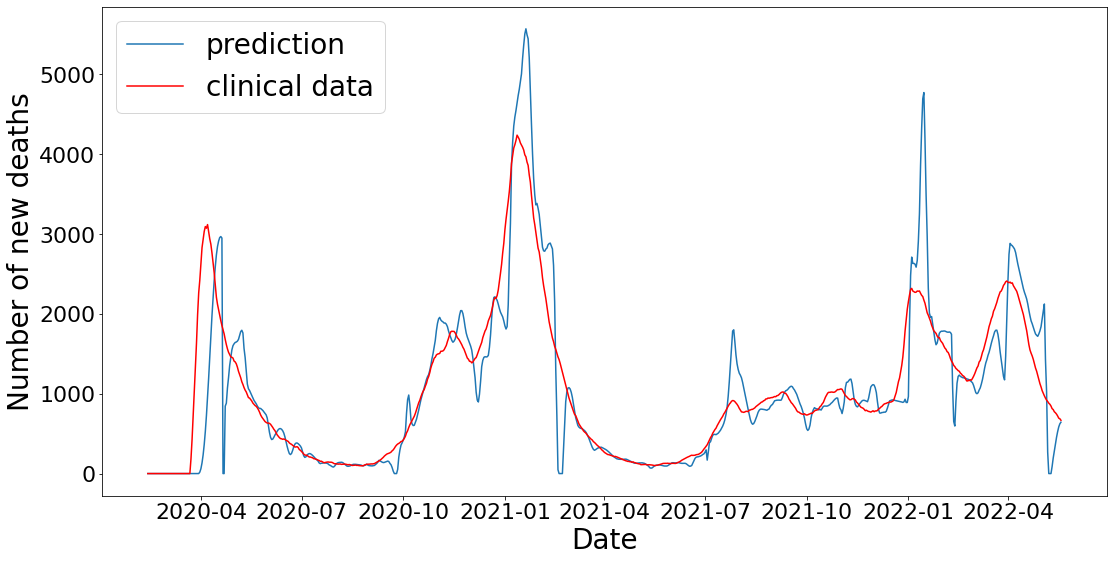

In [576]:
df = dfs['ons']
date = ['2020-02-13', '2022-05-19']
# metric = 'newCasesBySpecimenDate'
# metric = 'newDeaths28DaysByDeathDate'
metric = 'newAdmissions'
lag = 7
period = 14
n = 10
auto = True
search = False
auto_lag = 2
# model = 'Linear'
model = 'Elastic'
font_size = 22

r = forecasting_auto_regression(df, base_model=model, metric=metric, date=('2020-02-13', '2022-05-19'), n=n, lag=lag, period=period, 
                            cv=lag, auto=auto, search=search, auto_lag=auto_lag)
pred = pd.Series(list(r[0].values()), index=r[0].keys(), name=metric)
error = pd.DataFrame(r[1].values(), index=r[1].keys())
print(round(error.loc[date[0]:date[1]].mean(), 1))
# print(round(error.loc[date[0]:date[1]].std(), 1))
print(round(np.corrcoef(pred.loc[date[0]:date[1]].values, df.loc[date[0]:date[1], metric].values)[0][1], 3))
plt.figure(figsize=(18, 9))
plt.plot(pred.loc[date[0]:date[1]])
plt.plot(df[metric].loc[date[0]:date[1]], color='red')
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Date', fontsize=28)
plt.ylabel('Number of new deaths', fontsize=28)
plt.legend(['prediction', 'clinical data'], fontsize=28)
# plt.savefig('figures/country/lrm/{}_{}_{}_{}_{}_{}.pdf'.format(metric, period, n, auto, search, auto_lag))

In [569]:
df = dfs['ons']
date = ['2021-11-20', '2022-05-19']
# metric = 'newCasesBySpecimenDate'
# metric = 'newDeaths28DaysByDeathDate'
metric = 'newAdmissions'
shift = 21

df_shift = df[metric].shift(shift).loc[date[0]:date[1]].dropna()
df_copy = df[metric].loc[df_shift.index[0]:df_shift.index[-1]]
print(np.round(abs(df_copy - df_shift).mean(),1))
# print(np.round(abs(df_copy - df_shift).std(),1))
print(np.round(np.corrcoef(df_shift,  df_copy)[0][1],3))

497.0
0.641


/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/asai/miniforge3/envs/dsml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

0    58.9
dtype: float64
0    85.2
dtype: float64
0.553


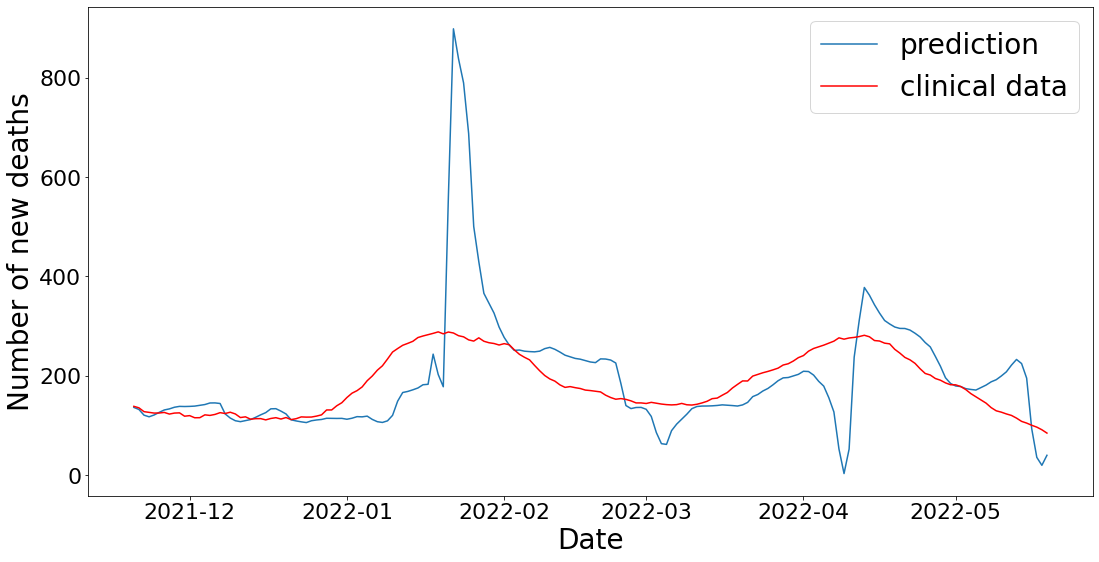

In [141]:
df = dfs['ons']
date = ['2021-11-20', '2022-05-19']
# metric = 'newCasesBySpecimenDate'
metric = 'newDeaths28DaysByDeathDate'
# metric = 'newAdmissions'
lag = 7
period = 14
n = 10
auto = True
search = False
auto_lag = 2
# model = 'Linear'
model = 'Elastic'
font_size = 22

r = forecasting_auto_regression(df, base_model=model, metric=metric, date=date, n=n, lag=lag, period=period, 
                            cv=lag, auto=auto, search=search, auto_lag=auto_lag)
pred = pd.Series(list(r[0].values()), index=r[0].keys(), name=metric)
error = pd.DataFrame(r[1].values(), index=r[1].keys())
print(round(error.loc[date[0]:date[1]].mean(), 1))
print(round(error.loc[date[0]:date[1]].std(), 1))
print(round(np.corrcoef(pred.loc[date[0]:date[1]].values, df.loc[date[0]:date[1], metric].values)[0][1], 3))
plt.figure(figsize=(18, 9))
plt.plot(pred.loc[date[0]:date[1]])
plt.plot(df[metric].loc[date[0]:date[1]], color='red')
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Date', fontsize=28)
plt.ylabel('Number of new deaths', fontsize=28)
plt.legend(['prediction', 'clinical data'], fontsize=28)
plt.savefig('figures/country/lrm_pred/{}_{}_{}_{}_{}_{}.pdf'.format(metric, period, n, auto, search, auto_lag))

In [373]:
from statsmodels import api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

def train_test_generate(dfs, metric='newDeaths28DaysByDeathDate', 
                        train_range=('2020-02-13', '2021-10-31'), test_range=('2021-11-01', '2022-05-19'),
                        lag=7, period=0, auto=True, search=True, auto_lag=0, time_step=30):

    idx = df.columns.get_loc('cumAdmissions')+1
    y = pd.DataFrame(df[metric])
    x = df.iloc[:, idx:]
    
    x_tmp = pd.DataFrame(index=y.index, columns=[])
    if auto==True:
        for i in range(0, auto_lag+1):
            x_tmp = pd.concat([x_tmp, pd.DataFrame(df[metric].shift(i+lag).values, index=y.index, columns=[metric+('_ar_'+str(i))])], axis=1)
    if search==True:
        for i in range(0, auto_lag+1):
            x_tmp = pd.concat([x_tmp, pd.DataFrame(x.shift(i).values, index=x.index, columns=x.columns+('_lag_'+str(i)))], axis=1)
    x = x_tmp.dropna()
    y = y.loc[x.index[0]:x.index[-1]]
    
    x_data = []
    y_data =[]
    for i in range(x.shape[0]-time_step):
        x_data.append(x.iloc[i:i+time_step,:])
        y_data.append(y.iloc[i+time_step-1])
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    train_start, train_end = y.index.get_loc(train_range[0]), y.index.get_loc(train_range[1])+1-time_step
    test_start, test_end = y.index.get_loc(test_range[0])-time_step, y.index.get_loc(test_range[1])+1-time_step
    
    y_train = y_data[period:train_end+period]
    x_train = x_data[:train_end]
    y_test = y_data[test_start+period:test_end,:]
    x_test = x_data[test_start:test_end-period]
    
    
    mm_x = MinMaxScaler()
    mm_y = MinMaxScaler()
    num_var = len(x.columns)
    x_train_shape = x_train.shape
    y_train_shape = y_train.shape
    x_test_shape = x_test.shape
    y_test_shape = y_test.shape
    
    x_train = mm_x.fit_transform(x_train.reshape(-1, num_var))
    y_train = mm_y.fit_transform(y_train.reshape(-1, 1))
    x_test = mm_x.transform(x_test.reshape(-1, num_var))
    y_test = mm_y.transform(y_test.reshape(-1, 1))
    x_train = x_train.reshape(x_train_shape)
    y_train = y_train.reshape(y_train_shape)
    x_test = x_test.reshape(x_test_shape)
    y_test = y_test.reshape(y_test_shape)
    
#     y_train = pd.DataFrame(mm_y.fit_transform(y_train), index=y_train.index)
#     x_train = pd.DataFrame(mm_x.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
#     y_test = pd.DataFrame(mm_y.transform(y_test), index=y_test.index)
#     x_test = pd.DataFrame(mm_x.fit_transform(x_test), index=x_test.index, columns=x_test.columns)
    
    return np.array(y_train), np.array(x_train), np.array(y_test), np.array(x_test), mm_y

In [374]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.layers import LSTM, GRU, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import elu

def create_model(input_dim, time_steps, latent_dim=128, n_features=16, dropout=.2):

    x = Input(shape=(time_steps, n_features))
    h = LSTM(latent_dim, activation='relu',  return_sequences=False, dropout=dropout)(x)
    out = Dense(1)(h)

    model = Model(inputs=x, outputs=out)
    model.summary()

    return model

In [527]:
df = dfs['ons']
# metric = 'newCasesBySpecimenDate'
metric = 'newDeaths28DaysByDeathDate'
# metric = 'newAdmissions'

lag=7
auto=True
search=True
period=0
auto_lag=2
time_step=10

idx = df.columns.get_loc('cumAdmissions')+1
if auto == True and search==True:
    n_features = len(df.iloc[:,idx:].columns)*(auto_lag+1)+(auto_lag+1)
elif auto == True and search==False:
    n_features = auto_lag+1
elif auto == False and search==True:
    n_features = len(df.iloc[:,idx:].columns)*(auto_lag+1)

In [528]:
test_range=('2021-11-20', '2022-05-19')

y_train, x_train, y_test, x_test, scaler = train_test_generate(dfs, metric=metric, train_range=('2020-02-13', '2021-11-19'), 
                                                               test_range=test_range,
                                                               lag=lag, auto=auto, search=search, period=period, auto_lag=auto_lag, time_step=time_step)

In [530]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsolutePercentageError, MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

latent_dim_list = [32, 64, 128]
dropout_list = [0.15, 0.25, 0.334]
histories = {}

for ld in latent_dim_list:
    for do in dropout_list:
        print(ld, ':', do)
        print('-'*20)
        model = create_model(input_dim=189, time_steps=time_step, latent_dim=ld, n_features=n_features, dropout=do)
        model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['mae'])

        best_model_path = './model_country/{}_{}_{}_{}'.format(auto, search, period, str(ld)+'_'+str(do))
        model_checkpoint = ModelCheckpoint(best_model_path,  
                                            verbose=1,
                                            monitor='val_mae',
                                            save_best_only=True)
        pretrain_csvlogger = CSVLogger('./log_country/{}_{}_{}_{}.csv'.format(auto, search, period, str(ld)+'_'+str(do)),   separator=",", append=True)
        callbacks_list = [model_checkpoint, pretrain_csvlogger]
        
        history = model.fit(x_train, y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.25, callbacks=callbacks_list)
        histories[str(ld)+'_'+str(do)] = history.history  

32 : 0.15
--------------------
Model: "model_457"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_458 (InputLayer)      [(None, 10, 48)]          0         
                                                                 
 lstm_457 (LSTM)             (None, 32)                10368     
                                                                 
 dense_457 (Dense)           (None, 1)                 33        
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
 1/18 [>.............................] - ETA: 8s - loss: 0.2645 - mae: 0.4535
Epoch 1: val_mae improved from inf to 0.23642, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 42ms/step - loss: 0.1322 - mae: 0.2751 - val_loss: 0.0609 - val_mae: 0.2364
Epoch 2/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0432 - mae: 0.1746
Epoch 2: val_mae improved from 0.23642 to 0.05601, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 36ms/step - loss: 0.0262 - mae: 0.1143 - val_loss: 0.0045 - val_mae: 0.0560
Epoch 3/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0110 - mae: 0.0837
Epoch 3: val_mae did not improve from 0.05601
18/18 [==============================] - 0s 4ms/step - loss: 0.0131 - mae: 0.0839 - val_loss: 0.0047 - val_mae: 0.0596
Epoch 4/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0063 - mae: 0.0590
Epoch 4: val_mae did not improve from 0.05601
18/18 [==============================] - 0s 3ms/step - loss: 0.0092 - mae: 0.0656 - val_loss: 0.0049 - val_mae: 0.0575
Epoch 5/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0050 - mae: 0.0464
Epoch 5: val_mae improved from 0.05601 to 0.05596, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 64ms/step - loss: 0.0076 - mae: 0.0568 - val_loss: 0.0059 - val_mae: 0.0560
Epoch 6/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0040 - mae: 0.0392
Epoch 6: val_mae improved from 0.05596 to 0.05346, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0068 - mae: 0.0537 - val_loss: 0.0051 - val_mae: 0.0535
Epoch 7/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0035 - mae: 0.0413
Epoch 7: val_mae improved from 0.05346 to 0.05065, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 36ms/step - loss: 0.0058 - mae: 0.0502 - val_loss: 0.0045 - val_mae: 0.0507
Epoch 8/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0045 - mae: 0.0454
Epoch 8: val_mae improved from 0.05065 to 0.04540, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 38ms/step - loss: 0.0051 - mae: 0.0465 - val_loss: 0.0035 - val_mae: 0.0454
Epoch 9/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0137 - mae: 0.0578
Epoch 9: val_mae did not improve from 0.04540
18/18 [==============================] - 0s 4ms/step - loss: 0.0057 - mae: 0.0459 - val_loss: 0.0048 - val_mae: 0.0503
Epoch 10/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0016 - mae: 0.0320
Epoch 10: val_mae did not improve from 0.04540
18/18 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0441 - val_loss: 0.0038 - val_mae: 0.0456
Epoch 11/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0023 - mae: 0.0345
Epoch 11: val_mae did not improve from 0.04540
18/18 [==============================] - 0s 3ms/step - loss: 0.0052 - mae: 0.0455 - val_loss: 0.0045 - val_mae: 0.0484
Epoch 12/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0124 - mae: 0.0633
Epoch 12: val_mae improv

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0056 - mae: 0.0472 - val_loss: 0.0038 - val_mae: 0.0452
Epoch 13/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0481
Epoch 13: val_mae improved from 0.04523 to 0.03920, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0041 - mae: 0.0425 - val_loss: 0.0027 - val_mae: 0.0392
Epoch 14/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0059 - mae: 0.0416
Epoch 14: val_mae improved from 0.03920 to 0.03795, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 53ms/step - loss: 0.0047 - mae: 0.0422 - val_loss: 0.0023 - val_mae: 0.0380
Epoch 15/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0124 - mae: 0.0713
Epoch 15: val_mae did not improve from 0.03795
18/18 [==============================] - 0s 3ms/step - loss: 0.0051 - mae: 0.0460 - val_loss: 0.0032 - val_mae: 0.0414
Epoch 16/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0034 - mae: 0.0368
Epoch 16: val_mae did not improve from 0.03795
18/18 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0414 - val_loss: 0.0027 - val_mae: 0.0400
Epoch 17/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0019 - mae: 0.0355
Epoch 17: val_mae did not improve from 0.03795
18/18 [==============================] - 0s 3ms/step - loss: 0.0039 - mae: 0.0400 - val_loss: 0.0033 - val_mae: 0.0438
Epoch 18/30
 1/18 [>.............................] - ETA: 0s - loss: 9.2757e-04 - mae: 0.0240
Epoch 18: val_mae 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0045 - mae: 0.0425 - val_loss: 0.0019 - val_mae: 0.0347
Epoch 23/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0018 - mae: 0.0313
Epoch 23: val_mae did not improve from 0.03467
18/18 [==============================] - 0s 3ms/step - loss: 0.0037 - mae: 0.0399 - val_loss: 0.0021 - val_mae: 0.0369
Epoch 24/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0028 - mae: 0.0402
Epoch 24: val_mae improved from 0.03467 to 0.03438, saving model to ./model_country/True_True_0_32_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 36ms/step - loss: 0.0042 - mae: 0.0418 - val_loss: 0.0018 - val_mae: 0.0344
Epoch 25/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0509
Epoch 25: val_mae did not improve from 0.03438
18/18 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0372 - val_loss: 0.0019 - val_mae: 0.0353
Epoch 26/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0368
Epoch 26: val_mae did not improve from 0.03438
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0370 - val_loss: 0.0028 - val_mae: 0.0405
Epoch 27/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0016 - mae: 0.0305
Epoch 27: val_mae did not improve from 0.03438
18/18 [==============================] - 0s 3ms/step - loss: 0.0032 - mae: 0.0371 - val_loss: 0.0021 - val_mae: 0.0368
Epoch 28/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0057 - mae: 0.0461
Epoch 28: val_mae impr

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.15/assets


18/18 [==============================] - 1s 36ms/step - loss: 0.0029 - mae: 0.0353 - val_loss: 0.0015 - val_mae: 0.0310
Epoch 29/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0335
Epoch 29: val_mae did not improve from 0.03096
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0362 - val_loss: 0.0023 - val_mae: 0.0393
Epoch 30/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0029 - mae: 0.0386
Epoch 30: val_mae did not improve from 0.03096
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0372 - val_loss: 0.0018 - val_mae: 0.0345
32 : 0.25
--------------------
Model: "model_458"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_459 (InputLayer)      [(None, 10, 48)]          0         
                                                                 
 lstm_458 (LSTM)             (None, 32)               

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.25/assets


18/18 [==============================] - 1s 43ms/step - loss: 0.0183 - mae: 0.1001 - val_loss: 0.0015 - val_mae: 0.0327
Epoch 2/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0142 - mae: 0.0882
Epoch 2: val_mae did not improve from 0.03274
18/18 [==============================] - 0s 3ms/step - loss: 0.0122 - mae: 0.0815 - val_loss: 0.0068 - val_mae: 0.0748
Epoch 3/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0132 - mae: 0.0891
Epoch 3: val_mae improved from 0.03274 to 0.02987, saving model to ./model_country/True_True_0_32_0.25
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.25/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.25/assets


18/18 [==============================] - 1s 53ms/step - loss: 0.0106 - mae: 0.0736 - val_loss: 0.0014 - val_mae: 0.0299
Epoch 4/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0041 - mae: 0.0487
Epoch 4: val_mae did not improve from 0.02987
18/18 [==============================] - 0s 2ms/step - loss: 0.0087 - mae: 0.0639 - val_loss: 0.0018 - val_mae: 0.0330
Epoch 5/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0085 - mae: 0.0709
Epoch 5: val_mae did not improve from 0.02987
18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0608 - val_loss: 0.0035 - val_mae: 0.0461
Epoch 6/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0114 - mae: 0.0657
Epoch 6: val_mae did not improve from 0.02987
18/18 [==============================] - 0s 3ms/step - loss: 0.0073 - mae: 0.0573 - val_loss: 0.0022 - val_mae: 0.0336
Epoch 7/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0075 - mae: 0.0483
Epoch 7: val_mae did not impr

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.25/assets


18/18 [==============================] - 1s 34ms/step - loss: 0.0043 - mae: 0.0398 - val_loss: 0.0011 - val_mae: 0.0287
Epoch 26/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0344
Epoch 26: val_mae did not improve from 0.02872
18/18 [==============================] - 0s 3ms/step - loss: 0.0025 - mae: 0.0332 - val_loss: 0.0057 - val_mae: 0.0700
Epoch 27/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0053 - mae: 0.0466
Epoch 27: val_mae did not improve from 0.02872
18/18 [==============================] - 0s 3ms/step - loss: 0.0036 - mae: 0.0393 - val_loss: 0.0043 - val_mae: 0.0593
Epoch 28/30
 6/18 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0369
Epoch 28: val_mae did not improve from 0.02872
18/18 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0393 - val_loss: 0.0019 - val_mae: 0.0387
Epoch 29/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0021 - mae: 0.0310
Epoch 29: val_mae impr

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.25/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0034 - mae: 0.0388 - val_loss: 4.6977e-04 - val_mae: 0.0179
Epoch 30/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0038 - mae: 0.0401
Epoch 30: val_mae did not improve from 0.01791
18/18 [==============================] - 0s 3ms/step - loss: 0.0035 - mae: 0.0372 - val_loss: 0.0017 - val_mae: 0.0367
32 : 0.334
--------------------
Model: "model_459"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_460 (InputLayer)      [(None, 10, 48)]          0         
                                                                 
 lstm_459 (LSTM)             (None, 32)                10368     
                                                                 
 dense_459 (Dense)           (None, 1)                 33        
                                                                 
Total params: 10,401
Trainable params: 10

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 41ms/step - loss: 0.0723 - mae: 0.1986 - val_loss: 0.0122 - val_mae: 0.0907
Epoch 2/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0259 - mae: 0.1392
Epoch 2: val_mae improved from 0.09074 to 0.07231, saving model to ./model_country/True_True_0_32_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 34ms/step - loss: 0.0225 - mae: 0.1190 - val_loss: 0.0073 - val_mae: 0.0723
Epoch 3/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0127 - mae: 0.0937
Epoch 3: val_mae improved from 0.07231 to 0.06353, saving model to ./model_country/True_True_0_32_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 67ms/step - loss: 0.0158 - mae: 0.0924 - val_loss: 0.0063 - val_mae: 0.0635
Epoch 4/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0126 - mae: 0.0849
Epoch 4: val_mae improved from 0.06353 to 0.03893, saving model to ./model_country/True_True_0_32_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 43ms/step - loss: 0.0132 - mae: 0.0798 - val_loss: 0.0026 - val_mae: 0.0389
Epoch 5/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0136 - mae: 0.0798
Epoch 5: val_mae improved from 0.03893 to 0.02480, saving model to ./model_country/True_True_0_32_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0101 - mae: 0.0717 - val_loss: 0.0012 - val_mae: 0.0248
Epoch 6/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0107 - mae: 0.0752
Epoch 6: val_mae did not improve from 0.02480
18/18 [==============================] - 0s 3ms/step - loss: 0.0093 - mae: 0.0671 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 7/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0424
Epoch 7: val_mae did not improve from 0.02480
18/18 [==============================] - 0s 3ms/step - loss: 0.0078 - mae: 0.0610 - val_loss: 0.0012 - val_mae: 0.0271
Epoch 8/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0127 - mae: 0.0790
Epoch 8: val_mae did not improve from 0.02480
18/18 [==============================] - 0s 3ms/step - loss: 0.0072 - mae: 0.0563 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 9/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0623
Epoch 9: val_mae did not impr

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0058 - mae: 0.0506 - val_loss: 6.0021e-04 - val_mae: 0.0177
Epoch 15/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0023 - mae: 0.0387
Epoch 15: val_mae did not improve from 0.01774
18/18 [==============================] - 0s 3ms/step - loss: 0.0053 - mae: 0.0484 - val_loss: 0.0018 - val_mae: 0.0387
Epoch 16/30
15/18 [========================>.....] - ETA: 0s - loss: 0.0045 - mae: 0.0436
Epoch 16: val_mae did not improve from 0.01774
18/18 [==============================] - 0s 10ms/step - loss: 0.0046 - mae: 0.0447 - val_loss: 0.0049 - val_mae: 0.0639
Epoch 17/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0026 - mae: 0.0413
Epoch 17: val_mae did not improve from 0.01774
18/18 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0452 - val_loss: 0.0033 - val_mae: 0.0542
Epoch 18/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0065 - mae: 0.0515
Epoch 18: val_mae

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 45ms/step - loss: 0.0049 - mae: 0.0458 - val_loss: 5.8988e-04 - val_mae: 0.0176
Epoch 20/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0019 - mae: 0.0321
Epoch 20: val_mae did not improve from 0.01760
18/18 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0433 - val_loss: 0.0064 - val_mae: 0.0768
Epoch 21/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0068 - mae: 0.0473
Epoch 21: val_mae did not improve from 0.01760
18/18 [==============================] - 0s 3ms/step - loss: 0.0045 - mae: 0.0427 - val_loss: 0.0028 - val_mae: 0.0498
Epoch 22/30
18/18 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0430
Epoch 22: val_mae did not improve from 0.01760
18/18 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0430 - val_loss: 0.0092 - val_mae: 0.0923
Epoch 23/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0355
Epoch 23: val_mae 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_32_0.334/assets


18/18 [==============================] - 1s 55ms/step - loss: 0.0045 - mae: 0.0420 - val_loss: 4.9538e-04 - val_mae: 0.0170
Epoch 26/30
18/18 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0502
Epoch 26: val_mae did not improve from 0.01703
18/18 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.0502 - val_loss: 9.8172e-04 - val_mae: 0.0277
Epoch 27/30
18/18 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0406
Epoch 27: val_mae did not improve from 0.01703
18/18 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0406 - val_loss: 0.0072 - val_mae: 0.0811
Epoch 28/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0041 - mae: 0.0328
Epoch 28: val_mae did not improve from 0.01703
18/18 [==============================] - 0s 3ms/step - loss: 0.0035 - mae: 0.0394 - val_loss: 0.0046 - val_mae: 0.0642
Epoch 29/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0042 - mae: 0.0392
Epoch 29: val_

INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


18/18 [==============================] - 2s 70ms/step - loss: 0.0996 - mae: 0.2348 - val_loss: 0.0064 - val_mae: 0.0782
Epoch 2/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0364 - mae: 0.1468
Epoch 2: val_mae improved from 0.07819 to 0.02937, saving model to ./model_country/True_True_0_64_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0191 - mae: 0.0938 - val_loss: 0.0013 - val_mae: 0.0294
Epoch 3/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0142 - mae: 0.0969
Epoch 3: val_mae improved from 0.02937 to 0.02006, saving model to ./model_country/True_True_0_64_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0109 - mae: 0.0737 - val_loss: 4.9961e-04 - val_mae: 0.0201
Epoch 4/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0162 - mae: 0.0721
Epoch 4: val_mae improved from 0.02006 to 0.01308, saving model to ./model_country/True_True_0_64_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0094 - mae: 0.0617 - val_loss: 2.8994e-04 - val_mae: 0.0131
Epoch 5/30
18/18 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0507
Epoch 5: val_mae improved from 0.01308 to 0.01212, saving model to ./model_country/True_True_0_64_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.15/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0067 - mae: 0.0507 - val_loss: 2.2726e-04 - val_mae: 0.0121
Epoch 6/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0085 - mae: 0.0611
Epoch 6: val_mae did not improve from 0.01212
18/18 [==============================] - 0s 4ms/step - loss: 0.0060 - mae: 0.0500 - val_loss: 0.0013 - val_mae: 0.0328
Epoch 7/30
17/18 [===========================>..] - ETA: 0s - loss: 0.0063 - mae: 0.0479
Epoch 7: val_mae did not improve from 0.01212
18/18 [==============================] - 0s 4ms/step - loss: 0.0063 - mae: 0.0481 - val_loss: 4.3618e-04 - val_mae: 0.0173
Epoch 8/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0035 - mae: 0.0434
Epoch 8: val_mae did not improve from 0.01212
18/18 [==============================] - 0s 4ms/step - loss: 0.0051 - mae: 0.0469 - val_loss: 0.0040 - val_mae: 0.0602
Epoch 9/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0088 - mae: 0.0572
Epoch 9: val_mae did 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.25/assets


18/18 [==============================] - 2s 75ms/step - loss: 0.0271 - mae: 0.1238 - val_loss: 0.0012 - val_mae: 0.0309
Epoch 2/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0248 - mae: 0.1238
Epoch 2: val_mae did not improve from 0.03087
18/18 [==============================] - 0s 3ms/step - loss: 0.0107 - mae: 0.0769 - val_loss: 0.0017 - val_mae: 0.0343
Epoch 3/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0593
Epoch 3: val_mae did not improve from 0.03087
18/18 [==============================] - 0s 3ms/step - loss: 0.0090 - mae: 0.0638 - val_loss: 0.0042 - val_mae: 0.0568
Epoch 4/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0147 - mae: 0.0812
Epoch 4: val_mae did not improve from 0.03087
18/18 [==============================] - 0s 3ms/step - loss: 0.0083 - mae: 0.0598 - val_loss: 0.0038 - val_mae: 0.0514
Epoch 5/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0081 - mae: 0.0580
Epoch 5: val_mae did not impr

INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.25/assets


18/18 [==============================] - 1s 38ms/step - loss: 0.0050 - mae: 0.0493 - val_loss: 0.0011 - val_mae: 0.0291
Epoch 14/30
15/18 [========================>.....] - ETA: 0s - loss: 0.0045 - mae: 0.0420
Epoch 14: val_mae did not improve from 0.02908
18/18 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0405 - val_loss: 0.0015 - val_mae: 0.0329
Epoch 15/30
17/18 [===========================>..] - ETA: 0s - loss: 0.0042 - mae: 0.0399
Epoch 15: val_mae did not improve from 0.02908
18/18 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0401 - val_loss: 0.0030 - val_mae: 0.0461
Epoch 16/30
 1/18 [>.............................] - ETA: 0s - loss: 9.8276e-04 - mae: 0.0266
Epoch 16: val_mae did not improve from 0.02908
18/18 [==============================] - 0s 5ms/step - loss: 0.0043 - mae: 0.0397 - val_loss: 0.0013 - val_mae: 0.0303
Epoch 17/30
11/18 [=================>............] - ETA: 0s - loss: 0.0042 - mae: 0.0398
Epoch 17: val_mae 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.25/assets


18/18 [==============================] - 1s 45ms/step - loss: 0.0030 - mae: 0.0343 - val_loss: 0.0011 - val_mae: 0.0281
Epoch 21/30
 8/18 [============>.................] - ETA: 0s - loss: 0.0030 - mae: 0.0351
Epoch 21: val_mae did not improve from 0.02808
18/18 [==============================] - 0s 7ms/step - loss: 0.0031 - mae: 0.0354 - val_loss: 0.0018 - val_mae: 0.0397
Epoch 22/30
17/18 [===========================>..] - ETA: 0s - loss: 0.0036 - mae: 0.0342
Epoch 22: val_mae did not improve from 0.02808
18/18 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0341 - val_loss: 0.0020 - val_mae: 0.0419
Epoch 23/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0054 - mae: 0.0357
Epoch 23: val_mae improved from 0.02808 to 0.01782, saving model to ./model_country/True_True_0_64_0.25
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.25/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.25/assets


18/18 [==============================] - 1s 38ms/step - loss: 0.0029 - mae: 0.0330 - val_loss: 4.2464e-04 - val_mae: 0.0178
Epoch 24/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0332
Epoch 24: val_mae did not improve from 0.01782
18/18 [==============================] - 0s 4ms/step - loss: 0.0042 - mae: 0.0434 - val_loss: 0.0021 - val_mae: 0.0424
Epoch 25/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0013 - mae: 0.0249
Epoch 25: val_mae did not improve from 0.01782
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0370 - val_loss: 0.0022 - val_mae: 0.0407
Epoch 26/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0016 - mae: 0.0308
Epoch 26: val_mae did not improve from 0.01782
18/18 [==============================] - 0s 3ms/step - loss: 0.0029 - mae: 0.0357 - val_loss: 6.4462e-04 - val_mae: 0.0217
Epoch 27/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0025 - mae: 0.0363
Epoch 27: val_

INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 48ms/step - loss: 0.0357 - mae: 0.1368 - val_loss: 0.0155 - val_mae: 0.1158
Epoch 2/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0266 - mae: 0.1085
Epoch 2: val_mae improved from 0.11576 to 0.06820, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 71ms/step - loss: 0.0124 - mae: 0.0806 - val_loss: 0.0066 - val_mae: 0.0682
Epoch 3/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0103 - mae: 0.0698
Epoch 3: val_mae did not improve from 0.06820
18/18 [==============================] - 0s 4ms/step - loss: 0.0105 - mae: 0.0715 - val_loss: 0.0066 - val_mae: 0.0695
Epoch 4/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0073 - mae: 0.0590
Epoch 4: val_mae improved from 0.06820 to 0.04474, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 40ms/step - loss: 0.0090 - mae: 0.0661 - val_loss: 0.0029 - val_mae: 0.0447
Epoch 5/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0078 - mae: 0.0667
Epoch 5: val_mae did not improve from 0.04474
18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0607 - val_loss: 0.0044 - val_mae: 0.0556
Epoch 6/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0083 - mae: 0.0671
Epoch 6: val_mae did not improve from 0.04474
18/18 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0602 - val_loss: 0.0030 - val_mae: 0.0483
Epoch 7/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0351
Epoch 7: val_mae improved from 0.04474 to 0.04044, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0080 - mae: 0.0555 - val_loss: 0.0023 - val_mae: 0.0404
Epoch 8/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0308
Epoch 8: val_mae improved from 0.04044 to 0.03985, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 38ms/step - loss: 0.0067 - mae: 0.0540 - val_loss: 0.0021 - val_mae: 0.0398
Epoch 9/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0074 - mae: 0.0570
Epoch 9: val_mae did not improve from 0.03985
18/18 [==============================] - 0s 3ms/step - loss: 0.0069 - mae: 0.0554 - val_loss: 0.0022 - val_mae: 0.0412
Epoch 10/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0056 - mae: 0.0514
Epoch 10: val_mae improved from 0.03985 to 0.03947, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0060 - mae: 0.0501 - val_loss: 0.0021 - val_mae: 0.0395
Epoch 11/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0119 - mae: 0.0651
Epoch 11: val_mae improved from 0.03947 to 0.03497, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 35ms/step - loss: 0.0057 - mae: 0.0501 - val_loss: 0.0019 - val_mae: 0.0350
Epoch 12/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0077 - mae: 0.0550
Epoch 12: val_mae did not improve from 0.03497
18/18 [==============================] - 0s 3ms/step - loss: 0.0057 - mae: 0.0486 - val_loss: 0.0023 - val_mae: 0.0424
Epoch 13/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0071 - mae: 0.0552
Epoch 13: val_mae did not improve from 0.03497
18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0531 - val_loss: 0.0043 - val_mae: 0.0580
Epoch 14/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0456
Epoch 14: val_mae did not improve from 0.03497
18/18 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0549 - val_loss: 0.0031 - val_mae: 0.0422
Epoch 15/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0033 - mae: 0.0516
Epoch 15: val_mae did 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 43ms/step - loss: 0.0054 - mae: 0.0469 - val_loss: 0.0019 - val_mae: 0.0321
Epoch 24/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0114 - mae: 0.0553
Epoch 24: val_mae did not improve from 0.03212
18/18 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0434 - val_loss: 0.0023 - val_mae: 0.0427
Epoch 25/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0403
Epoch 25: val_mae did not improve from 0.03212
18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0493 - val_loss: 0.0056 - val_mae: 0.0673
Epoch 26/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0042 - mae: 0.0556
Epoch 26: val_mae improved from 0.03212 to 0.02215, saving model to ./model_country/True_True_0_64_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_64_0.334/assets


18/18 [==============================] - 1s 71ms/step - loss: 0.0054 - mae: 0.0516 - val_loss: 7.2952e-04 - val_mae: 0.0222
Epoch 27/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0043 - mae: 0.0448
Epoch 27: val_mae did not improve from 0.02215
18/18 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0399 - val_loss: 0.0016 - val_mae: 0.0348
Epoch 28/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0391
Epoch 28: val_mae did not improve from 0.02215
18/18 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0417 - val_loss: 0.0012 - val_mae: 0.0299
Epoch 29/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0105 - mae: 0.0515
Epoch 29: val_mae did not improve from 0.02215
18/18 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0422 - val_loss: 0.0022 - val_mae: 0.0408
Epoch 30/30
 1/18 [>.............................] - ETA: 0s - loss: 0.0021 - mae: 0.0336
Epoch 30: val_mae 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 54ms/step - loss: 0.0324 - mae: 0.1305 - val_loss: 0.0013 - val_mae: 0.0284
Epoch 2/30
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0644
Epoch 2: val_mae improved from 0.02842 to 0.02272, saving model to ./model_country/True_True_0_128_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 68ms/step - loss: 0.0088 - mae: 0.0644 - val_loss: 7.2944e-04 - val_mae: 0.0227
Epoch 3/30
11/18 [=================>............] - ETA: 0s - loss: 0.0060 - mae: 0.0515
Epoch 3: val_mae improved from 0.02272 to 0.01920, saving model to ./model_country/True_True_0_128_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 49ms/step - loss: 0.0056 - mae: 0.0486 - val_loss: 5.9032e-04 - val_mae: 0.0192
Epoch 4/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0052 - mae: 0.0462
Epoch 4: val_mae did not improve from 0.01920
18/18 [==============================] - 0s 6ms/step - loss: 0.0048 - mae: 0.0437 - val_loss: 0.0026 - val_mae: 0.0459
Epoch 5/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0041 - mae: 0.0384
Epoch 5: val_mae did not improve from 0.01920
18/18 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0401 - val_loss: 0.0013 - val_mae: 0.0293
Epoch 6/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0040 - mae: 0.0406
Epoch 6: val_mae did not improve from 0.01920
18/18 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0389 - val_loss: 5.8182e-04 - val_mae: 0.0207
Epoch 7/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0046 - mae: 0.0434
Epoch 7: val_mae did 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 43ms/step - loss: 0.0041 - mae: 0.0462 - val_loss: 5.4488e-04 - val_mae: 0.0182
Epoch 12/30
11/18 [=================>............] - ETA: 0s - loss: 0.0025 - mae: 0.0297
Epoch 12: val_mae did not improve from 0.01815
18/18 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0298 - val_loss: 6.6951e-04 - val_mae: 0.0204
Epoch 13/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0021 - mae: 0.0296
Epoch 13: val_mae did not improve from 0.01815
18/18 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0338 - val_loss: 0.0011 - val_mae: 0.0284
Epoch 14/30
18/18 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0347
Epoch 14: val_mae did not improve from 0.01815
18/18 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0347 - val_loss: 8.0525e-04 - val_mae: 0.0238
Epoch 15/30
11/18 [=================>............] - ETA: 0s - loss: 0.0029 - mae: 0.0343
Epoch 15: 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 64ms/step - loss: 0.0022 - mae: 0.0304 - val_loss: 3.6747e-04 - val_mae: 0.0152
Epoch 18/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0019 - mae: 0.0290
Epoch 18: val_mae did not improve from 0.01517
18/18 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0301 - val_loss: 4.6393e-04 - val_mae: 0.0173
Epoch 19/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0023 - mae: 0.0318
Epoch 19: val_mae did not improve from 0.01517
18/18 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0309 - val_loss: 9.1550e-04 - val_mae: 0.0273
Epoch 20/30
11/18 [=================>............] - ETA: 0s - loss: 0.0016 - mae: 0.0265
Epoch 20: val_mae did not improve from 0.01517
18/18 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0267 - val_loss: 7.1552e-04 - val_mae: 0.0218
Epoch 21/30
11/18 [=================>............] - ETA: 0s - loss: 0.0019 - mae: 0.0272
Epoch 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 39ms/step - loss: 0.0014 - mae: 0.0262 - val_loss: 3.6476e-04 - val_mae: 0.0145
Epoch 25/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0013 - mae: 0.0219    
Epoch 25: val_mae did not improve from 0.01452
18/18 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0212 - val_loss: 5.8852e-04 - val_mae: 0.0183
Epoch 26/30
11/18 [=================>............] - ETA: 0s - loss: 0.0011 - mae: 0.0204    
Epoch 26: val_mae did not improve from 0.01452
18/18 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0212 - val_loss: 5.9256e-04 - val_mae: 0.0213
Epoch 27/30
11/18 [=================>............] - ETA: 0s - loss: 0.0017 - mae: 0.0247
Epoch 27: val_mae did not improve from 0.01452
18/18 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0230 - val_loss: 3.2900e-04 - val_mae: 0.0146
Epoch 28/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0014 - mae: 0.023

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 39ms/step - loss: 0.0015 - mae: 0.0241 - val_loss: 3.2189e-04 - val_mae: 0.0139
Epoch 29/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0032 - mae: 0.0357
Epoch 29: val_mae did not improve from 0.01392
18/18 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0336 - val_loss: 6.7788e-04 - val_mae: 0.0207
Epoch 30/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0019 - mae: 0.0260
Epoch 30: val_mae improved from 0.01392 to 0.01109, saving model to ./model_country/True_True_0_128_0.15
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.15/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0019 - mae: 0.0257 - val_loss: 2.0677e-04 - val_mae: 0.0111
128 : 0.25
--------------------
Model: "model_464"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_465 (InputLayer)      [(None, 10, 48)]          0         
                                                                 
 lstm_464 (LSTM)             (None, 128)               90624     
                                                                 
 dense_464 (Dense)           (None, 1)                 129       
                                                                 
Total params: 90,753
Trainable params: 90,753
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
14/18 [======================>.......] - ETA: 0s - loss: 0.0334 - mae: 0.1388
Epoch 1: val_mae improved from inf to 0.05869, saving model to ./model_c

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.25/assets


18/18 [==============================] - 1s 44ms/step - loss: 0.0303 - mae: 0.1294 - val_loss: 0.0041 - val_mae: 0.0587
Epoch 2/30
11/18 [=================>............] - ETA: 0s - loss: 0.0130 - mae: 0.0806
Epoch 2: val_mae improved from 0.05869 to 0.02131, saving model to ./model_country/True_True_0_128_0.25
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.25/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.25/assets


18/18 [==============================] - 1s 58ms/step - loss: 0.0114 - mae: 0.0748 - val_loss: 7.1804e-04 - val_mae: 0.0213
Epoch 3/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0075 - mae: 0.0575
Epoch 3: val_mae did not improve from 0.02131
18/18 [==============================] - 0s 6ms/step - loss: 0.0072 - mae: 0.0562 - val_loss: 7.8051e-04 - val_mae: 0.0249
Epoch 4/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0056 - mae: 0.0485
Epoch 4: val_mae did not improve from 0.02131
18/18 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0507 - val_loss: 0.0033 - val_mae: 0.0534
Epoch 5/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0058 - mae: 0.0505
Epoch 5: val_mae did not improve from 0.02131
18/18 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0499 - val_loss: 0.0053 - val_mae: 0.0672
Epoch 6/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0063 - mae: 0.0494
Epoch 6: val_mae did 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.25/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0057 - mae: 0.0501 - val_loss: 8.1031e-04 - val_mae: 0.0212
Epoch 10/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0053 - mae: 0.0436
Epoch 10: val_mae did not improve from 0.02125
18/18 [==============================] - 0s 6ms/step - loss: 0.0048 - mae: 0.0410 - val_loss: 0.0018 - val_mae: 0.0343
Epoch 11/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0042 - mae: 0.0412
Epoch 11: val_mae did not improve from 0.02125
18/18 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0417 - val_loss: 0.0068 - val_mae: 0.0772
Epoch 12/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0035 - mae: 0.0391
Epoch 12: val_mae did not improve from 0.02125
18/18 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0392 - val_loss: 9.4599e-04 - val_mae: 0.0227
Epoch 13/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0037 - mae: 0.0414
Epoch 13: val_

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.25/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0034 - mae: 0.0386 - val_loss: 5.2727e-04 - val_mae: 0.0183
Epoch 18/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0033 - mae: 0.0345
Epoch 18: val_mae did not improve from 0.01826
18/18 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0371 - val_loss: 0.0012 - val_mae: 0.0275
Epoch 19/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0031 - mae: 0.0366
Epoch 19: val_mae did not improve from 0.01826
18/18 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0363 - val_loss: 7.7325e-04 - val_mae: 0.0218
Epoch 20/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0027 - mae: 0.0320
Epoch 20: val_mae did not improve from 0.01826
18/18 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0346 - val_loss: 0.0019 - val_mae: 0.0392
Epoch 21/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0031 - mae: 0.0340
Epoch 21: val_

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.25/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0039 - mae: 0.0404 - val_loss: 4.0920e-04 - val_mae: 0.0158
Epoch 24/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0047 - mae: 0.0496
Epoch 24: val_mae did not improve from 0.01585
18/18 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0454 - val_loss: 4.0786e-04 - val_mae: 0.0165
Epoch 25/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0037 - mae: 0.0368
Epoch 25: val_mae did not improve from 0.01585
18/18 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0381 - val_loss: 0.0021 - val_mae: 0.0416
Epoch 26/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0041 - mae: 0.0402
Epoch 26: val_mae did not improve from 0.01585
18/18 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0394 - val_loss: 0.0044 - val_mae: 0.0615
Epoch 27/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0033 - mae: 0.0379
Epoch 27: val_

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 42ms/step - loss: 0.0276 - mae: 0.1220 - val_loss: 0.0034 - val_mae: 0.0477
Epoch 2/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0114 - mae: 0.0725
Epoch 2: val_mae improved from 0.04766 to 0.03931, saving model to ./model_country/True_True_0_128_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0105 - mae: 0.0695 - val_loss: 0.0022 - val_mae: 0.0393
Epoch 3/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0088 - mae: 0.0662
Epoch 3: val_mae did not improve from 0.03931
18/18 [==============================] - 0s 6ms/step - loss: 0.0082 - mae: 0.0643 - val_loss: 0.0051 - val_mae: 0.0603
Epoch 4/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0062 - mae: 0.0553
Epoch 4: val_mae did not improve from 0.03931
18/18 [==============================] - 0s 5ms/step - loss: 0.0065 - mae: 0.0556 - val_loss: 0.0024 - val_mae: 0.0406
Epoch 5/30
13/18 [====================>.........] - ETA: 0s - loss: 0.0061 - mae: 0.0521
Epoch 5: val_mae did not improve from 0.03931
18/18 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0525 - val_loss: 0.0047 - val_mae: 0.0596
Epoch 6/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0050 - mae: 0.0471
Epoch 6: val_mae did not impr

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 58ms/step - loss: 0.0073 - mae: 0.0586 - val_loss: 0.0020 - val_mae: 0.0381
Epoch 10/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0057 - mae: 0.0518
Epoch 10: val_mae did not improve from 0.03812
18/18 [==============================] - 0s 6ms/step - loss: 0.0056 - mae: 0.0510 - val_loss: 0.0024 - val_mae: 0.0399
Epoch 11/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0068 - mae: 0.0508
Epoch 11: val_mae improved from 0.03812 to 0.02825, saving model to ./model_country/True_True_0_128_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 38ms/step - loss: 0.0062 - mae: 0.0487 - val_loss: 0.0012 - val_mae: 0.0283
Epoch 12/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0031 - mae: 0.0347
Epoch 12: val_mae did not improve from 0.02825
18/18 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0385 - val_loss: 0.0020 - val_mae: 0.0394
Epoch 13/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0039 - mae: 0.0400
Epoch 13: val_mae did not improve from 0.02825
18/18 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0396 - val_loss: 0.0022 - val_mae: 0.0411
Epoch 14/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0043 - mae: 0.0428
Epoch 14: val_mae did not improve from 0.02825
18/18 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0436 - val_loss: 0.0015 - val_mae: 0.0300
Epoch 15/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0048 - mae: 0.0424
Epoch 15: val_mae did 

INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 39ms/step - loss: 0.0050 - mae: 0.0457 - val_loss: 0.0014 - val_mae: 0.0274
Epoch 18/30
11/18 [=================>............] - ETA: 0s - loss: 0.0045 - mae: 0.0411
Epoch 18: val_mae did not improve from 0.02740
18/18 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0395 - val_loss: 0.0018 - val_mae: 0.0362
Epoch 19/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0035 - mae: 0.0377
Epoch 19: val_mae improved from 0.02740 to 0.02525, saving model to ./model_country/True_True_0_128_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0038 - mae: 0.0382 - val_loss: 9.7097e-04 - val_mae: 0.0252
Epoch 20/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0031 - mae: 0.0366
Epoch 20: val_mae did not improve from 0.02525
18/18 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0347 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 21/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0023 - mae: 0.0343
Epoch 21: val_mae improved from 0.02525 to 0.01911, saving model to ./model_country/True_True_0_128_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0030 - mae: 0.0351 - val_loss: 5.8370e-04 - val_mae: 0.0191
Epoch 22/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0034 - mae: 0.0382
Epoch 22: val_mae did not improve from 0.01911
18/18 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0389 - val_loss: 7.0590e-04 - val_mae: 0.0216
Epoch 23/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0039 - mae: 0.0363
Epoch 23: val_mae did not improve from 0.01911
18/18 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0373 - val_loss: 0.0024 - val_mae: 0.0403
Epoch 24/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0037 - mae: 0.0412
Epoch 24: val_mae improved from 0.01911 to 0.01791, saving model to ./model_country/True_True_0_128_0.334
INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


INFO:tensorflow:Assets written to: ./model_country/True_True_0_128_0.334/assets


18/18 [==============================] - 1s 37ms/step - loss: 0.0035 - mae: 0.0412 - val_loss: 5.4091e-04 - val_mae: 0.0179
Epoch 25/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0047 - mae: 0.0453
Epoch 25: val_mae did not improve from 0.01791
18/18 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0470 - val_loss: 0.0028 - val_mae: 0.0503
Epoch 26/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0034 - mae: 0.0354
Epoch 26: val_mae did not improve from 0.01791
18/18 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0353 - val_loss: 9.4889e-04 - val_mae: 0.0269
Epoch 27/30
12/18 [===================>..........] - ETA: 0s - loss: 0.0018 - mae: 0.0280
Epoch 27: val_mae did not improve from 0.01791
18/18 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0307 - val_loss: 0.0012 - val_mae: 0.0317
Epoch 28/30
11/18 [=================>............] - ETA: 0s - loss: 0.0026 - mae: 0.0340
Epoch 28: val_

In [531]:
maes = {}
for key, metrics in histories.items():
    maes[key] = metrics['val_mae']
mae_list = np.array(list(maes.values())).flatten()

minimum = np.min(mae_list)
for key, m in maes.items():
    if minimum in m:
        print(key)
        key = key
        print(np.argmin(m))
        idx = np.argmin(m)

128_0.15
29


In [532]:
from  tensorflow.keras.models import load_model

model_path = './model_country/{}_{}_{}_{}'.format(auto, search, period, key)
model = load_model(model_path)
preds = model.predict(x_test)

y_test = np.array(y_test)
preds = np.array(preds)

y_test_shape = y_test.shape
pred_shape = preds.shape
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
preds = scaler.inverse_transform(preds.reshape(-1, 1))
y_test = y_test.reshape(y_test_shape[0], -1)
preds = preds.reshape(pred_shape)

In [533]:
preds = np.array([p[0] if p>=[0.0] else 0.0 for p in preds])
y_test = np.array([t[0] for t in y_test])

In [534]:
print(np.round(np.mean(np.abs(preds-y_test)),1))
print(np.round(np.std(np.abs(preds-y_test)),1))
print(np.round(np.corrcoef(preds, y_test)[0][1], 3))

62.5
45.5
0.266


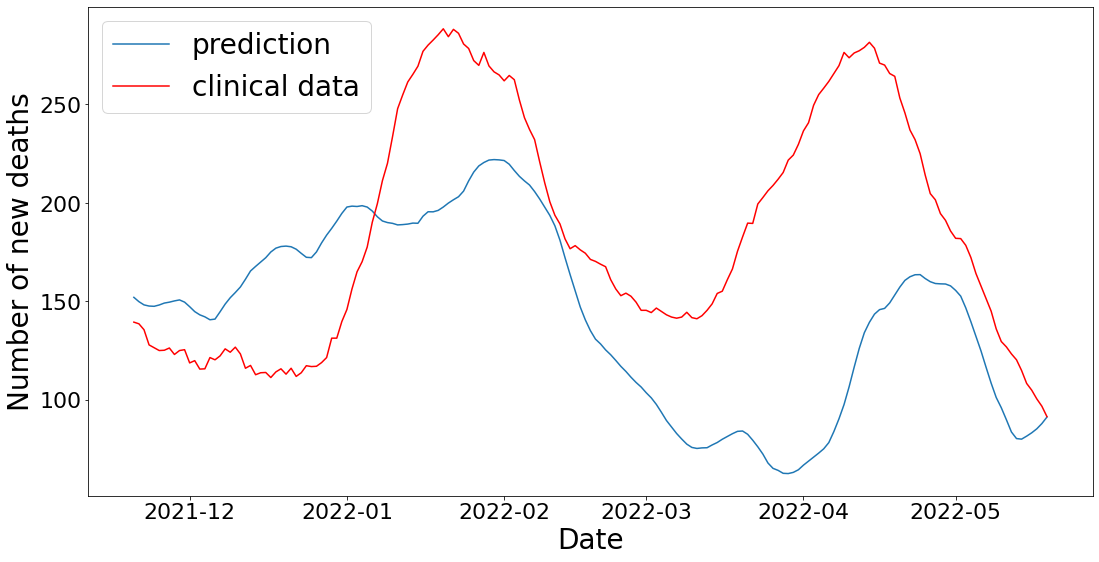

In [535]:
date = df.index[df.index.get_loc(test_range[0])+period:]

font_size=22

plt.figure(figsize=(18, 9))
plt.plot(pd.DataFrame(preds, index=date))
plt.plot(pd.DataFrame(y_test, index=date), color='red')
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Date', fontsize=28)
plt.ylabel('Number of new deaths', fontsize=28)
plt.legend(['prediction', 'clinical data'], fontsize=28)
plt.savefig('figures/country/lstm/{}_{}_{}_{}_{}_{}.pdf'.format(metric, period, time_step, auto, search, auto_lag))